In [1]:
# Perspective transformation
# http://stackoverflow.com/questions/14177744/how-does-perspective-transformation-work-in-pil

In [7]:
import numpy

def find_coeffs(pa, pb):
    '''
    Determine coefficients for the PIL.Image.transform
    where pb is the four vertices in the current plane, 
    and pa contains four vertices in the resulting plane.
    '''
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = numpy.matrix(matrix, dtype=numpy.float)
    B = numpy.array(pb).reshape(8)

    res = numpy.dot(numpy.linalg.inv(A.T * A) * A.T, B)
    return numpy.array(res).reshape(8)

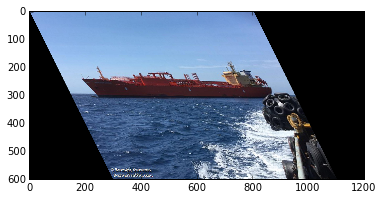

In [11]:
import sys
from PIL import Image

img = Image.open("NAVIGATOR_UMBRIO.jpg")
width, height = img.size
m = -0.5
xshift = abs(m) * width
new_width = width + int(round(xshift))
img = img.transform((new_width, height), Image.AFFINE,
        (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
img.save("output.jpg")

%matplotlib inline
from matplotlib.pyplot import imshow
imshow(numpy.asarray(img))

My Example

(800, 600)


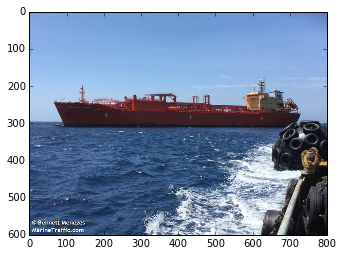

In [23]:
img = Image.open("NAVIGATOR_UMBRIO.jpg")
print img.size
width, height = img.size
#imshow(numpy.asarray(img))
imshow(img)

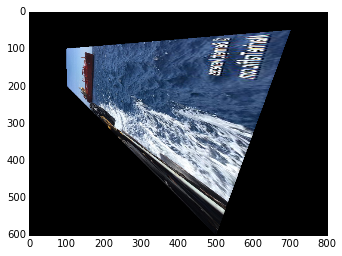

In [22]:
current_plane = [(0, 0), (width, 0), (width, height), (0, height)]
resulting_plane = [(100,100), (100,200), (500,600), (700,50)]
coeffs = find_coeffs(resulting_plane, current_plane)

img2 = img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
#imshow(numpy.asarray(img2))
imshow(img2)

http://stackoverflow.com/questions/3864899/resampling-irregularly-spaced-data-to-a-regular-grid-in-python

http://scikit-image.org/docs/dev/auto_examples/plot_template.html

http://stackoverflow.com/questions/26649716/how-to-show-pil-image-in-ipython-notebook

http://hds.leica-geosystems.com/en/Support-Downloads-Example-Databases_29453.htm

http://www.cnczone.com/forums/carken-products-deskam-deskcnc-etc-/59556-stl-point-cloud-help-please.html

## Roof image

(2592, 1456)


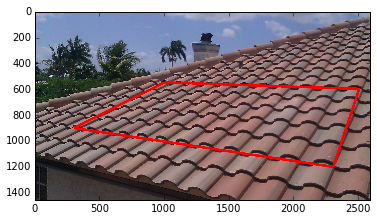

In [57]:
from PIL import Image, ImageDraw

img = Image.open("roof.jpg")
print img.size
width, height = img.size

a = (300, 900)
b = (2300, 1200)
c = (2500, 600)
d = (1000, 550)
current_plane = [a, b, c, d]

img1 = img.copy()
draw = ImageDraw.Draw(img1)
draw.line((a[0],a[1], b[0],b[1]), fill=255, width=20)
draw.line((b[0],b[1], c[0],c[1]), fill=255, width=20)
draw.line((c[0],c[1], d[0],d[1]), fill=255, width=20)
draw.line((d[0],d[1], a[0],a[1]), fill=255, width=20)
imshow(img1)

In [38]:
help(draw.line)

Help on method line in module PIL.ImageDraw:

line(self, xy, fill=None, width=0) method of PIL.ImageDraw.ImageDraw instance



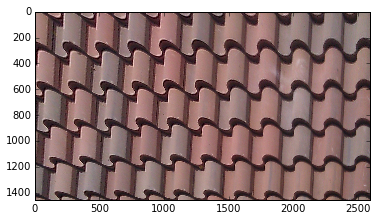

In [58]:
resulting_plane = [(0, height), (width, height), (width, 0), (0, 0)]
coeffs = find_coeffs(resulting_plane, current_plane)

img2 = img.transform((width, height), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
imshow(img2)

In [27]:
help(img.transform)

Help on method transform in module PIL.Image:

transform(self, size, method, data=None, resample=0, fill=1) method of PIL.JpegImagePlugin.JpegImageFile instance
    Transforms this image.  This method creates a new image with the
    given size, and the same mode as the original, and copies data
    to the new image using the given transform.
    
    :param size: The output size.
    :param method: The transformation method.  This is one of
      :py:attr:`PIL.Image.EXTENT` (cut out a rectangular subregion),
      :py:attr:`PIL.Image.AFFINE` (affine transform),
      :py:attr:`PIL.Image.PERSPECTIVE` (perspective transform),
      :py:attr:`PIL.Image.QUAD` (map a quadrilateral to a rectangle), or
      :py:attr:`PIL.Image.MESH` (map a number of source quadrilaterals
      in one operation).
    :param data: Extra data to the transformation method.
    :param resample: Optional resampling filter.  It can be one of
       :py:attr:`PIL.Image.NEAREST` (use nearest neighbour),
       :py:a